# Convert raw images into numpy memory maps

In [1]:
import os
import glob
import numpy as np
from tqdm.auto import tqdm
from PIL import Image
from multiprocessing import Pool

# constants
IMAGE_PATH = os.path.join(os.getcwd(), 'data', 'raw', 'images')
IMAGE_EXT = '.png'
SAVE_PATH = os.path.join(os.getcwd(), 'data', 'images')
SAVE_EXT = '.memmap'
PROCESSES = 32
DTYPE = 'uint8'

def image_to_memmap(image_path: str) -> None:
    """
    Convert an RGB image to a numpy memmap file.
    """
    # book keeping
    name = os.path.basename(image_path)
    sub_dir = os.path.dirname(image_path).split(os.sep)[-1]
    save_dir = os.path.join(SAVE_PATH, sub_dir)
    save_name = os.path.join(save_dir, name.replace(IMAGE_EXT, SAVE_EXT))

    # skip if already exists
    if os.path.exists(save_name):
        return

    # load image
    image = np.array(Image.open(image_path).convert('RGB'))
    
    # create save directories
    os.makedirs(SAVE_PATH, exist_ok=True)
    os.makedirs(save_dir, exist_ok=True)

    # save image as memmap
    memmap = np.memmap(save_name, dtype=DTYPE, mode='w+', shape=image.shape)
    memmap[:] = image[:]
    del memmap

# find image paths
image_paths = sorted(glob.glob(
    os.path.join(IMAGE_PATH, '**', '*' + IMAGE_EXT), 
    recursive=True))

# convert images to memmaps
with Pool(PROCESSES) as pool:
    list(tqdm(
        pool.imap(image_to_memmap, image_paths), 
        total=len(image_paths), 
        desc='Converting images to memmaps'))

Converting images to memmaps:   0%|          | 0/2000 [00:00<?, ?it/s]

# Visualize sample memmap images

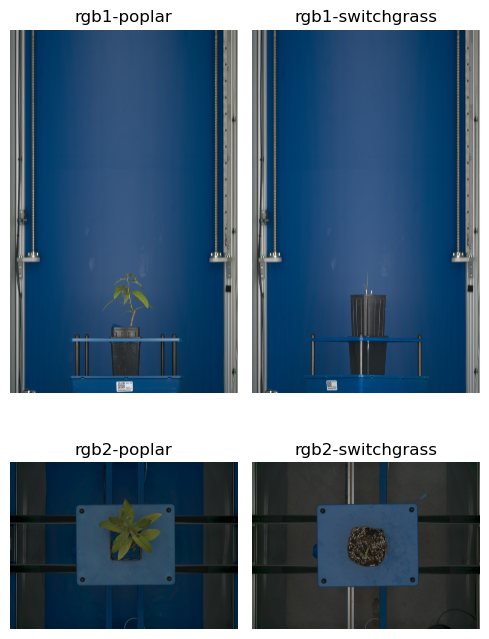

In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# constants
RGB1_HEIGHT = 6556
RGB1_WIDTH = 4104
RGB1_CHANNELS = 3
RGB2_HEIGHT = 3006
RGB2_WIDTH = 4104
RGB2_CHANNELS = 3
DTYPE = 'uint8'
MEMMAP_PATH = os.path.join(os.getcwd(), 'data', 'images')
MEMMAP_EXT = '.memmap'

# create figure
fig, axs = plt.subplots(2, 2, figsize=(5, 7.5))
axs = axs.flatten()

# test an image from each subdirectory
for i, sub_dir in enumerate(sorted(os.listdir(MEMMAP_PATH))):

    # assign shape based on subdirectory
    if 'rgb1' in sub_dir:
        w, h, c = RGB1_WIDTH, RGB1_HEIGHT, RGB1_CHANNELS
    if 'rgb2' in sub_dir:
        w, h, c = RGB2_WIDTH, RGB2_HEIGHT, RGB2_CHANNELS

    # find memmap paths
    paths = sorted(glob.glob(os.path.join(MEMMAP_PATH, sub_dir, '*' + MEMMAP_EXT)))

    # open the first memmap file
    memmap = np.memmap(paths[0], dtype=DTYPE, mode='r', shape=(h, w, c))
    image = np.array(memmap)
    del memmap
    
    # plot the image
    axs[i].imshow(image)
    axs[i].set_title(f'{sub_dir}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Convert raw masks into numpy memory maps

In [3]:
import os
import glob
import numpy as np
from tqdm.auto import tqdm
from PIL import Image
from multiprocessing import Pool

# constants
MASK_PATH = os.path.join(os.getcwd(), 'data', 'raw', 'masks')
MASK_EXT = '.png'
SAVE_PATH = os.path.join(os.getcwd(), 'data', 'masks')
SAVE_EXT = '.memmap'
PROCESSES = 32
DTYPE = 'bool'

def mask_to_memmap(mask_path: str) -> None:
    """
    Convert a mask image to a numpy memmap file.
    """
    # book keeping
    name = os.path.basename(mask_path)
    sub_dir = os.path.dirname(mask_path).split(os.sep)[-2]
    save_dir = os.path.join(SAVE_PATH, sub_dir)
    save_name = os.path.join(save_dir, name.replace(MASK_EXT, SAVE_EXT))

    # skip if already exists
    if os.path.exists(save_name):
        return

    # load mask
    mask = np.array(Image.open(mask_path).convert('RGB'))
    mask = mask[:, :, 0] > 128 # convert red channel to boolean mask

    # create save directories
    os.makedirs(SAVE_PATH, exist_ok=True)
    os.makedirs(save_dir, exist_ok=True)

    # save image as memmap
    memmap = np.memmap(save_name, dtype=DTYPE, mode='w+', shape=mask.shape)
    memmap[:] = mask[:]
    del memmap

# find mask paths
mask_paths = sorted(glob.glob(
    os.path.join(MASK_PATH, '**', 'SegmentationClass', '*' + MASK_EXT), 
    recursive=True))

# convert masks to memmaps
with Pool(PROCESSES) as pool:
    list(tqdm(
        pool.imap(mask_to_memmap, mask_paths), 
        total=len(mask_paths), 
        desc='Converting masks to memmaps'))

Converting masks to memmaps:   0%|          | 0/2000 [00:00<?, ?it/s]

# Visualize sample memmap masks

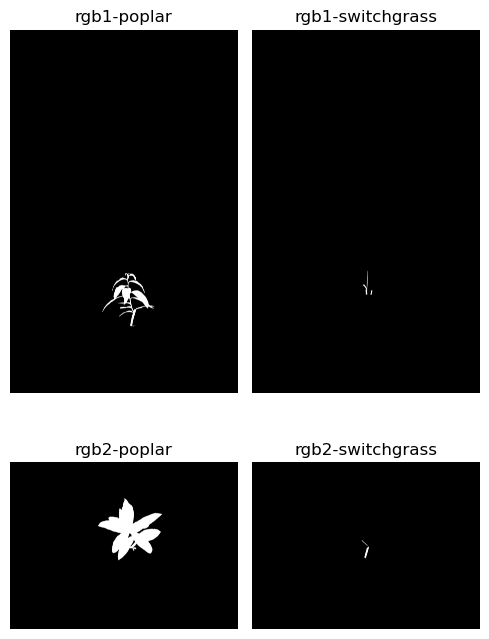

In [11]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# constants
RGB1_HEIGHT = 6556
RGB1_WIDTH = 4104
RGB2_HEIGHT = 3006
RGB2_WIDTH = 4104
DTYPE = 'bool'
MEMMAP_PATH = os.path.join(os.getcwd(), 'data', 'masks')
MEMMAP_EXT = '.memmap'

# create figure
fig, axs = plt.subplots(2, 2, figsize=(5, 7.5))
axs = axs.flatten()

# test a mask from each subdirectory
for i, sub_dir in enumerate(sorted(os.listdir(MEMMAP_PATH))):

    # assign shape based on subdirectory
    if 'rgb1' in sub_dir:
        w, h = RGB1_WIDTH, RGB1_HEIGHT
    if 'rgb2' in sub_dir:
        w, h = RGB2_WIDTH, RGB2_HEIGHT

    # find memmap paths
    paths = sorted(glob.glob(os.path.join(MEMMAP_PATH, sub_dir, '*' + MEMMAP_EXT)))

    # open the first memmap file
    memmap = np.memmap(paths[0], dtype=DTYPE, mode='r', shape=(h, w))
    mask = np.array(memmap)
    del memmap
    
    # plot the mask
    axs[i].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axs[i].set_title(f'{sub_dir}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Convert masks into foreground/background pixels

In [1]:
import os
import glob
import numpy as np
from tqdm.auto import tqdm
from scipy import ndimage
from multiprocessing import Pool

# constants
TILE_SIZE = 224 # 224, 448
N_POINTS = 10000
SEED = 0
PROCESSES = 8
RGB1_HEIGHT = 6556
RGB1_WIDTH = 4104
RGB2_HEIGHT = 3006
RGB2_WIDTH = 4104
DTYPE = 'bool'
MASK_PATH = os.path.join(os.getcwd(), 'data', 'masks')
MASK_EXT = '.memmap'
SAVE_PATH = os.path.join(os.getcwd(), 'data', f'rois_{TILE_SIZE}')
SAVE_EXT = '.npz'

def mask_to_roi(mask_path: str) -> None:
    """
    Convert a mask image to a numpy memmap file.
    """
    # book keeping
    np.random.seed(SEED)
    name = os.path.basename(mask_path)
    sub_dir = os.path.dirname(mask_path).split(os.sep)[-1]
    save_dir = os.path.join(SAVE_PATH, sub_dir)
    save_name = os.path.join(save_dir, name.replace(MASK_EXT, SAVE_EXT))

    # # skip if already exists
    # if os.path.exists(save_name):
    #     return

    # create save directories
    os.makedirs(SAVE_PATH, exist_ok=True)
    os.makedirs(save_dir, exist_ok=True)

    # load mask
    if 'rgb1' in sub_dir:
        w, h = RGB1_WIDTH, RGB1_HEIGHT
    if 'rgb2' in sub_dir:
        w, h = RGB2_WIDTH, RGB2_HEIGHT
    memmap = np.memmap(mask_path, dtype=DTYPE, mode='r', shape=(h, w))
    mask = np.array(memmap)
    del memmap

    # compute Euclidean distance transform and threshold
    edt = ndimage.distance_transform_edt(~mask)
    edt[edt < TILE_SIZE] = 1
    edt[edt >= TILE_SIZE] = 0
    edt[:TILE_SIZE//2, :], edt[-TILE_SIZE//2:, :] = -1, -1 # border exclusion
    edt[:, :TILE_SIZE//2], edt[:, -TILE_SIZE//2:] = -1, -1 # border exclusion

    # get foreground and background indices
    foreground_idx = np.flatnonzero(edt == 1).astype(np.int32)
    background_idx = np.flatnonzero(edt == 0).astype(np.int32)
    foreground_idx = np.random.choice(
        foreground_idx, size=min(N_POINTS, len(foreground_idx)), replace=False)
    background_idx = np.random.choice(
        background_idx, size=min(N_POINTS, len(background_idx)), replace=False)

    # save indices
    np.savez_compressed(save_name, f_idx=foreground_idx, b_idx=background_idx)

# find mask paths
mask_paths = sorted(glob.glob(
    os.path.join(MASK_PATH, '**', '*' + MASK_EXT), 
    recursive=True))

# convert masks to rois
with Pool(PROCESSES) as pool:
    list(tqdm(
        pool.imap(mask_to_roi, mask_paths), 
        total=len(mask_paths), 
        desc='Converting masks to rois'))

Converting masks to rois:   0%|          | 0/2000 [00:00<?, ?it/s]

# Visualize sample ROIs

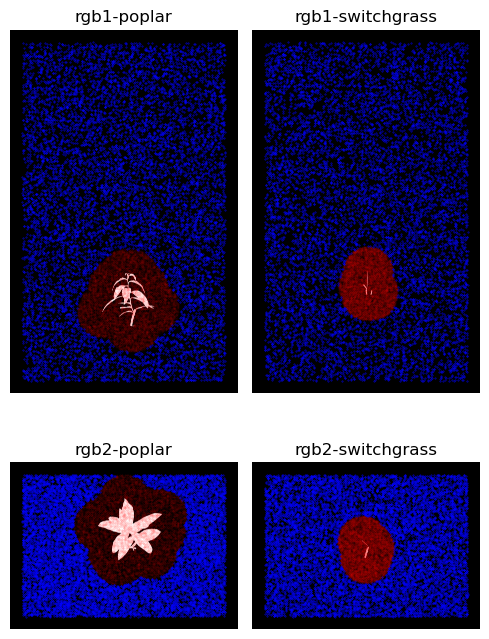

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# constants
TILE_SIZE = 224 # 224, 448
RGB1_HEIGHT = 6556
RGB1_WIDTH = 4104
RGB2_HEIGHT = 3006
RGB2_WIDTH = 4104
DTYPE = 'bool'
MASK_PATH = os.path.join(os.getcwd(), 'data', 'masks')
MASK_EXT = '.memmap'
ROI_PATH = os.path.join(os.getcwd(), 'data', f'rois_{TILE_SIZE}')
ROI_EXT = '.npz'

# create figure
fig, axs = plt.subplots(2, 2, figsize=(5, 7.5))
axs = axs.flatten()

# test a mask from each subdirectory
for i, sub_dir in enumerate(sorted(os.listdir(MASK_PATH))):

    # open the mask
    if 'rgb1' in sub_dir:
        w, h = RGB1_WIDTH, RGB1_HEIGHT
    if 'rgb2' in sub_dir:
        w, h = RGB2_WIDTH, RGB2_HEIGHT
    paths = sorted(glob.glob(os.path.join(MASK_PATH, sub_dir, '*' + MASK_EXT)))
    memmap = np.memmap(paths[0], dtype=DTYPE, mode='r', shape=(h, w))
    mask = np.array(memmap)
    del memmap

    # open the ROI
    roi_paths = sorted(glob.glob(os.path.join(ROI_PATH, sub_dir, '*' + ROI_EXT)))
    roi = np.load(roi_paths[0])
    f_idx = roi['f_idx']
    b_idx = roi['b_idx']
    
    # plot the mask
    axs[i].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axs[i].scatter(f_idx % w, f_idx // w, s=0.1, c='red', label='foreground', alpha=0.1)
    axs[i].scatter(b_idx % w, b_idx // w, s=0.1, c='blue', label='background', alpha=1)
    axs[i].set_title(f'{sub_dir}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Train / val / test split

In [7]:
import os
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit
from typing import Tuple

# constants
METADATA_DIR = os.path.join(os.getcwd(), 'data', 'raw', 'metadata')
METADATA_NAME = 'metadata.csv'
SAVE_DIR = os.path.join(os.getcwd(), 'data', 'metadata')
MAX_RESHUFFLE_ITERS = 1000
SAMPLES_PER_SPLIT = 250
RANDOM_STATE = 42

def split(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split DataFrame into train and target sets.
    """
    # build train/test splitter
    splitter = GroupShuffleSplit(
        n_splits=MAX_RESHUFFLE_ITERS,
        test_size=SAMPLES_PER_SPLIT / len(df),
        random_state=RANDOM_STATE
    )
        
    # reshuffle splits until we find SAMPLES_PER_SPLIT in the test set
    for train_idx, target_idx in splitter.split(df, groups=df['Group']):
        if len(df.iloc[target_idx]) == SAMPLES_PER_SPLIT:
            break

    # raise an error if the test set does not have SAMPLES_PER_SPLIT samples
    if len(df.iloc[target_idx]) != SAMPLES_PER_SPLIT:
        raise ValueError('Failed to find exact split')

    # split the metadata into train and test sets
    train_df = df.iloc[train_idx].reset_index(drop=True)
    target_df = df.iloc[target_idx].reset_index(drop=True)

    return train_df, target_df

# load metadata and form 'Group' column
df = pd.read_csv(os.path.join(METADATA_DIR, METADATA_NAME))
df['Group'] = df['Species'].astype(str) + '_' + df['Plant ID'].astype(str)

# split metadata into train/val/test sets
train_df, test_df = split(df)
train_df, val_df = split(train_df)

# verify that no splits share the same Species / Plant ID
assert set(train_df['Group']).isdisjoint(set(val_df['Group']))
assert set(train_df['Group']).isdisjoint(set(test_df['Group']))
assert set(val_df['Group']).isdisjoint(set(test_df['Group']))

# save the splits
os.makedirs(SAVE_DIR, exist_ok=True)
train_df.to_csv(os.path.join(SAVE_DIR, 'train.csv'), index=False)
val_df.to_csv(os.path.join(SAVE_DIR, 'val.csv'), index=False)
test_df.to_csv(os.path.join(SAVE_DIR, 'test.csv'), index=False)